In [237]:
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries
import matplotlib.pyplot as plt
import numpy as np


In [238]:
LISTING_ENRICHED_FILE = "scraped/working/listings_data_enriched.csv"
LISTING_BASIC_FILE = "scraped/working/listings_data_basic.csv"
LISTING_COMBINED_FILE = "scraped/working/listings_data_combined.csv"

In [239]:
df1 = pd.read_csv(LISTING_BASIC_FILE)
#df1 = df1.drop('Links','Address')
df1.head()

,ids,Links,Address,Description,Price,version,borough
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')"
1,103815017,https://www.rightmove.co.uk/properties/1038150...,"Clifton Park Avenue, London, SW20",2 bedroom apartment for sale,350000.0,v0007_170622,"('Merton', '5E61414')"
2,104102132,https://www.rightmove.co.uk/properties/1041021...,"Charminster Road, Worcester Park, Surrey, KT4",4 bedroom detached house for sale,850000.0,v0007_170622,"('Sutton', '5E93974')"
3,104457248,https://www.rightmove.co.uk/properties/1044572...,"Kingston Road, Raynes Park, London",1 bedroom apartment for sale,420000.0,v0007_170622,"('Merton', '5E61414')"
4,104489204,https://www.rightmove.co.uk/properties/1044892...,"High Street, Sutton",2 bedroom maisonette for sale,330000.0,v0007_170622,"('Sutton', '5E93974')"


In [240]:
df2 = pd.read_csv(LISTING_ENRICHED_FILE)
df2.head()

,ids,version,link,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description
0,123510599,v0001_130622,--,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85572123,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85701084,v0001_130622,--,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80180424,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96572116,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
df_original = df1.merge(df2, left_on='ids',right_on='ids', suffixes=('_head','_indiv'))
df_original.to_csv(LISTING_COMBINED_FILE, encoding="utf-8", header="true", index=True)

In [242]:
#df_original['Target'] = df_original['Price'].fillna(0.0).str.replace('[£,]', '').replace('POA', 0.0).astype('float')
df_original.set_index("ids", inplace=True)
df_original = df_original[~df_original.index.duplicated(keep='last')]


In [243]:
df_original = df_original.drop(['Links','version_head','version_indiv','link'], axis=1)

In [244]:
df_original['Target'] = df_original['Price'].fillna(0.0)
df_original.shape

(2152, 16)

In [245]:
df_original = df_original[df_original["Target"] != 'POA']
df_original.shape

(2149, 16)

In [246]:
df_original['postcode'] = df_original["Address"].str.extract("([A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}|[A-Z]{1,2}\d[A-Z\d]?)")
df_original['compass'] = df_original["postcode"].str[0:2]
df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette)")
df_original['sq_ft'] = df_original["size"].str.extract("(\d*) sq. ft.")
df_original['hold_type2'] = df_original["hold_type"].str.replace("Tenure:","").str.strip()

df_original

,Address,Description,Price,borough,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,Target,postcode,compass,sq_ft,hold_type2
ids,,,,,,,,,,,,,,,,,,,,
102189851,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,"('City of London', '5E61224')",0.1,apartment,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,EC2Y,EC,NaN,NaN
103815017,"Clifton Park Avenue, London, SW20",2 bedroom apartment for sale,350000.0,"('Merton', '5E61414')",0.1,apartment,2.0,1.0,NaN,NaN,Double Aspect Reception/Lounge Diner;Modern Ki...,"[(0.1, 'Raynes Park Station', 'svg-nationalrai...",Tenure: Leasehold,Read more,A bright and spacious two double bedroom secon...,350000.0,SW20,SW,NaN,Leasehold
104102132,"Charminster Road, Worcester Park, Surrey, KT4",4 bedroom detached house for sale,850000.0,"('Sutton', '5E93974')",0.9,house,4.0,2.0,NaN,NaN,ENTRANCE HALLWAY;FITTED KITCHEN /FAMILY ROOM 2...,"[(0.9, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE PORCH\r Double glazed front door to:-...,850000.0,KT4,KT,NaN,Freehold
104457248,"Kingston Road, Raynes Park, London",1 bedroom apartment for sale,420000.0,"('Merton', '5E61414')",0.2,apartment,1.0,1.0,NaN,NaN,Estate Manager;24 hour helpline & video entry ...,"[(0.2, 'Wimbledon Chase Station', 'svg-nationa...",Tenure: Leasehold,Read more,A well presented and spacious one bedroom firs...,420000.0,NaN,NaN,NaN,Leasehold
104489204,"High Street, Sutton",2 bedroom maisonette for sale,330000.0,"('Sutton', '5E93974')",0.4,maisonette,2.0,1.0,NaN,NaN,Long Lease;Private Garden;Split Level;Low Serv...,"[(0.4, 'West Sutton Station', 'svg-nationalrai...",Tenure: Leasehold,Read more,SUMMARY Unexpectedly back available! A two bed...,330000.0,NaN,NaN,NaN,Leasehold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96654973,"Queens Road, Wimbledon",3 bedroom flat for sale,650000.0,"('Merton', '5E61414')",0.7,flat,3.0,2.0,NaN,NaN,Three Bedrooms;Two Bathrooms;Private Garden;No...,"[(0.8, 'Haydons Road Station', 'svg-nationalra...",Tenure: Leasehold,Read more,"A three bedroom, two bathroom garden flat with...",650000.0,NaN,NaN,NaN,Leasehold
96655021,"Besley Street, Streatham",3 bedroom house for sale,675000.0,"('Wandsworth', '5E93977')",0.2,house,3.0,2.0,NaN,NaN,Three Bedrooms;Two Bathrooms;Large Garden;Open...,"[(0.2, 'Streatham Common Station', 'svg-nation...",Tenure: Freehold,Read more,A charming three bedroom family home with larg...,675000.0,NaN,NaN,NaN,Freehold
97404863,"Brook Court, 78 Wordsworth Drive, Sutton, SM3",1 bedroom apartment for sale,175000.0,"('Sutton', '5E93974')",0.9,apartment,1.0,1.0,NaN,NaN,Specialist Retirement/sheltered housing develo...,"[(0.9, 'Stoneleigh Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Exclusive to Andrews a ground floor one-bedroo...,175000.0,SM3,SM,NaN,Leasehold


In [247]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 102189851 to 99839117
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            2149 non-null   object 
 1   Description        2149 non-null   object 
 2   Price              2149 non-null   object 
 3   borough            2107 non-null   object 
 4   Station_Prox       2149 non-null   float64
 5   type               2075 non-null   object 
 6   bedrooms           2095 non-null   float64
 7   bathrooms          1962 non-null   float64
 8   size               322 non-null    object 
 9   other_key_info     46 non-null     object 
 10  bullet_points      1839 non-null   object 
 11  station_info       2003 non-null   object 
 12  hold_type          1774 non-null   object 
 13  short_description  2003 non-null   object 
 14  long_description   2003 non-null   object 
 15  Target             2149 non-null   object 
 16  postcode    

In [248]:
df_original["sq_ft"] = pd.to_numeric(df_original["sq_ft"], 'coerce').fillna(-1).astype(int)
df_original["Target"] = pd.to_numeric(df_original["Target"], 'coerce').fillna(-1).astype(int)

In [249]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 102189851 to 99839117
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            2149 non-null   object 
 1   Description        2149 non-null   object 
 2   Price              2149 non-null   object 
 3   borough            2107 non-null   object 
 4   Station_Prox       2149 non-null   float64
 5   type               2075 non-null   object 
 6   bedrooms           2095 non-null   float64
 7   bathrooms          1962 non-null   float64
 8   size               322 non-null    object 
 9   other_key_info     46 non-null     object 
 10  bullet_points      1839 non-null   object 
 11  station_info       2003 non-null   object 
 12  hold_type          1774 non-null   object 
 13  short_description  2003 non-null   object 
 14  long_description   2003 non-null   object 
 15  Target             2149 non-null   int64  
 16  postcode    

In [250]:
df_original.describe()

,Station_Prox,bedrooms,bathrooms,Target,sq_ft
count,2149.00000,2095.000000,1962.000000,2.149000e+03,2149.000000
mean,0.36645,2.353222,1.506116,7.547124e+05,83.492322
std,0.25119,1.228952,0.816213,1.008493e+06,225.930725
min,0.00000,1.000000,1.000000,3.000000e+03,-1.000000
25%,0.20000,1.000000,1.000000,3.350000e+05,-1.000000
50%,0.30000,2.000000,1.000000,5.000000e+05,-1.000000
75%,0.50000,3.000000,2.000000,7.999500e+05,-1.000000
max,4.60000,8.000000,6.000000,1.700000e+07,999.000000


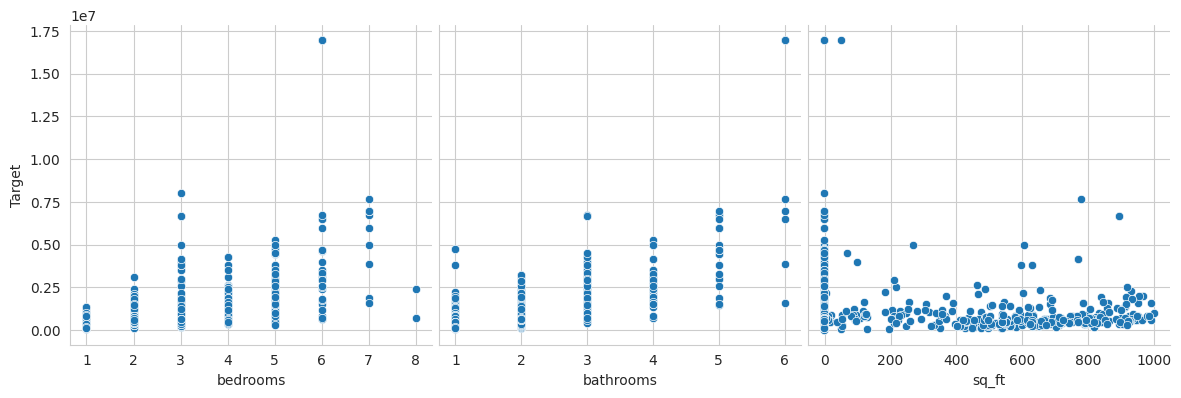

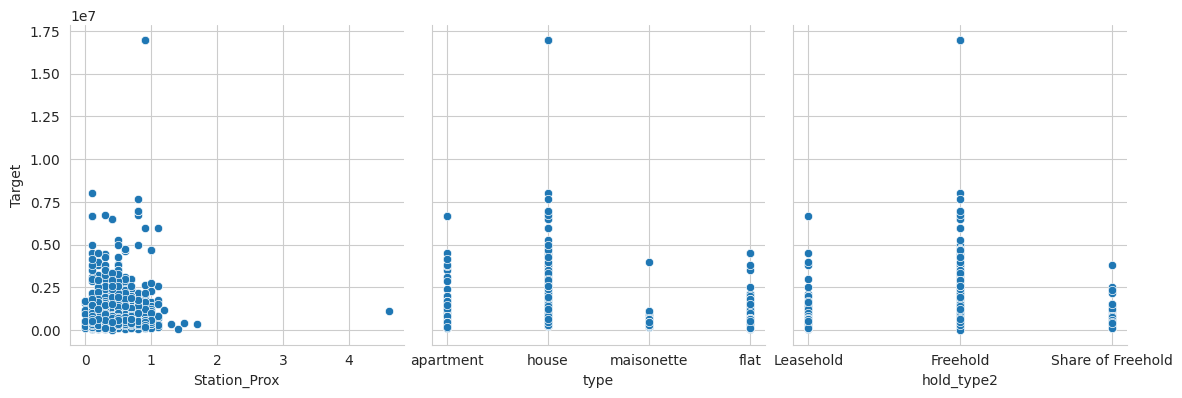

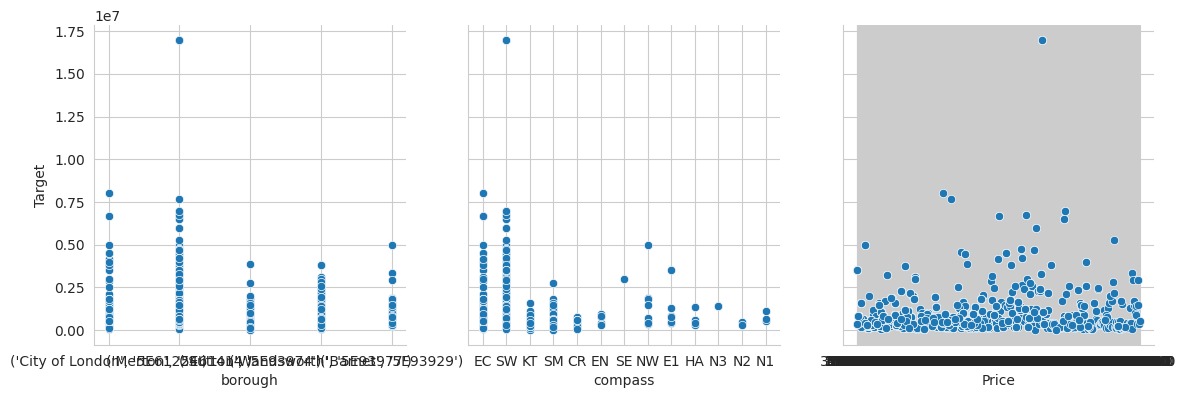

In [251]:
# Using pairplot we'll visualize the data for correlation

#sns.pairplot(df_original, x_vars=['bedrooms', 'postcode','type'],
#plt.figure(figsize=(20,15))
#sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms','compass','type','Station_Prox','hold_type2','sq_ft','Price','borough'], y_vars='Target', height=4, aspect=4, kind='scatter')
sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms','sq_ft'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df_original, x_vars=['Station_Prox','type','hold_type2'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df_original, x_vars=['borough','compass','Price'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


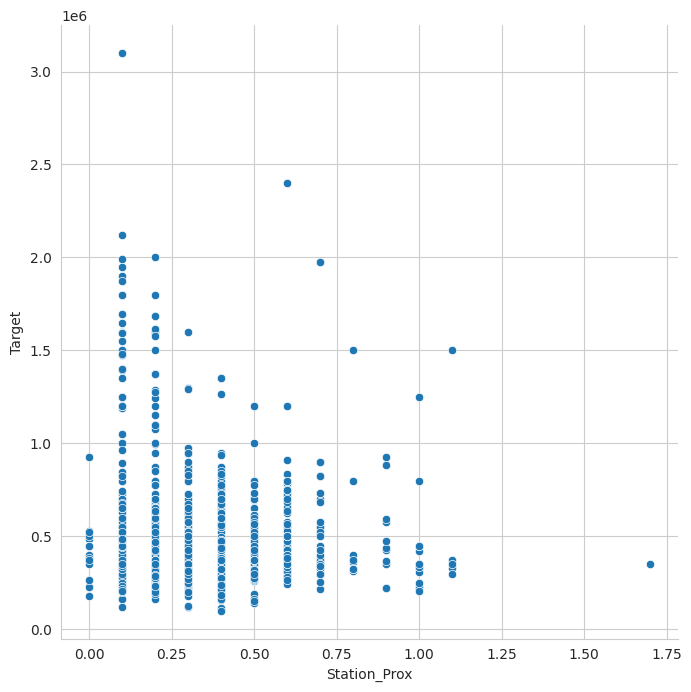

In [252]:
sns.pairplot(df_original[df_original['bedrooms'] == 2], x_vars=['Station_Prox'], y_vars='Target', size=7, aspect=1, kind='scatter')
plt.show()

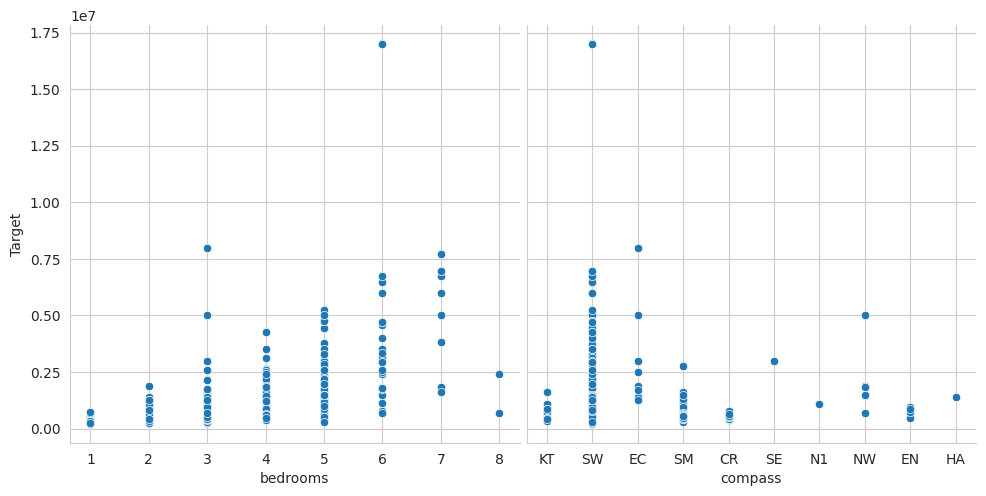

In [253]:
sns.pairplot(df_original[df_original["type"] == "house"], x_vars=['bedrooms', 'compass'],
             y_vars='Target', height=5, aspect=1, kind='scatter')
plt.show()

array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'Target'}>],
       [<AxesSubplot:title={'center':'sq_ft'}>, <AxesSubplot:>]],
      dtype=object)

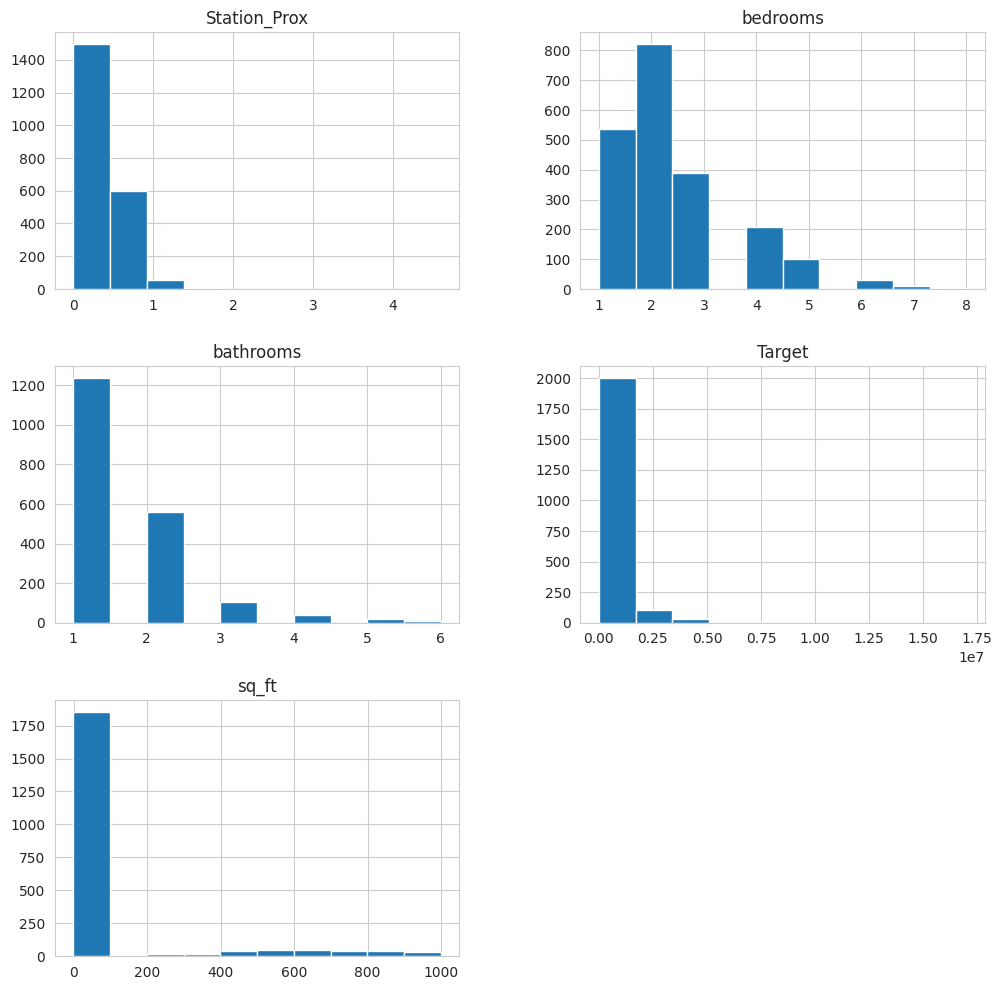

In [254]:
df_original.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'Target'}>],
       [<AxesSubplot:title={'center':'sq_ft'}>, <AxesSubplot:>]],
      dtype=object)

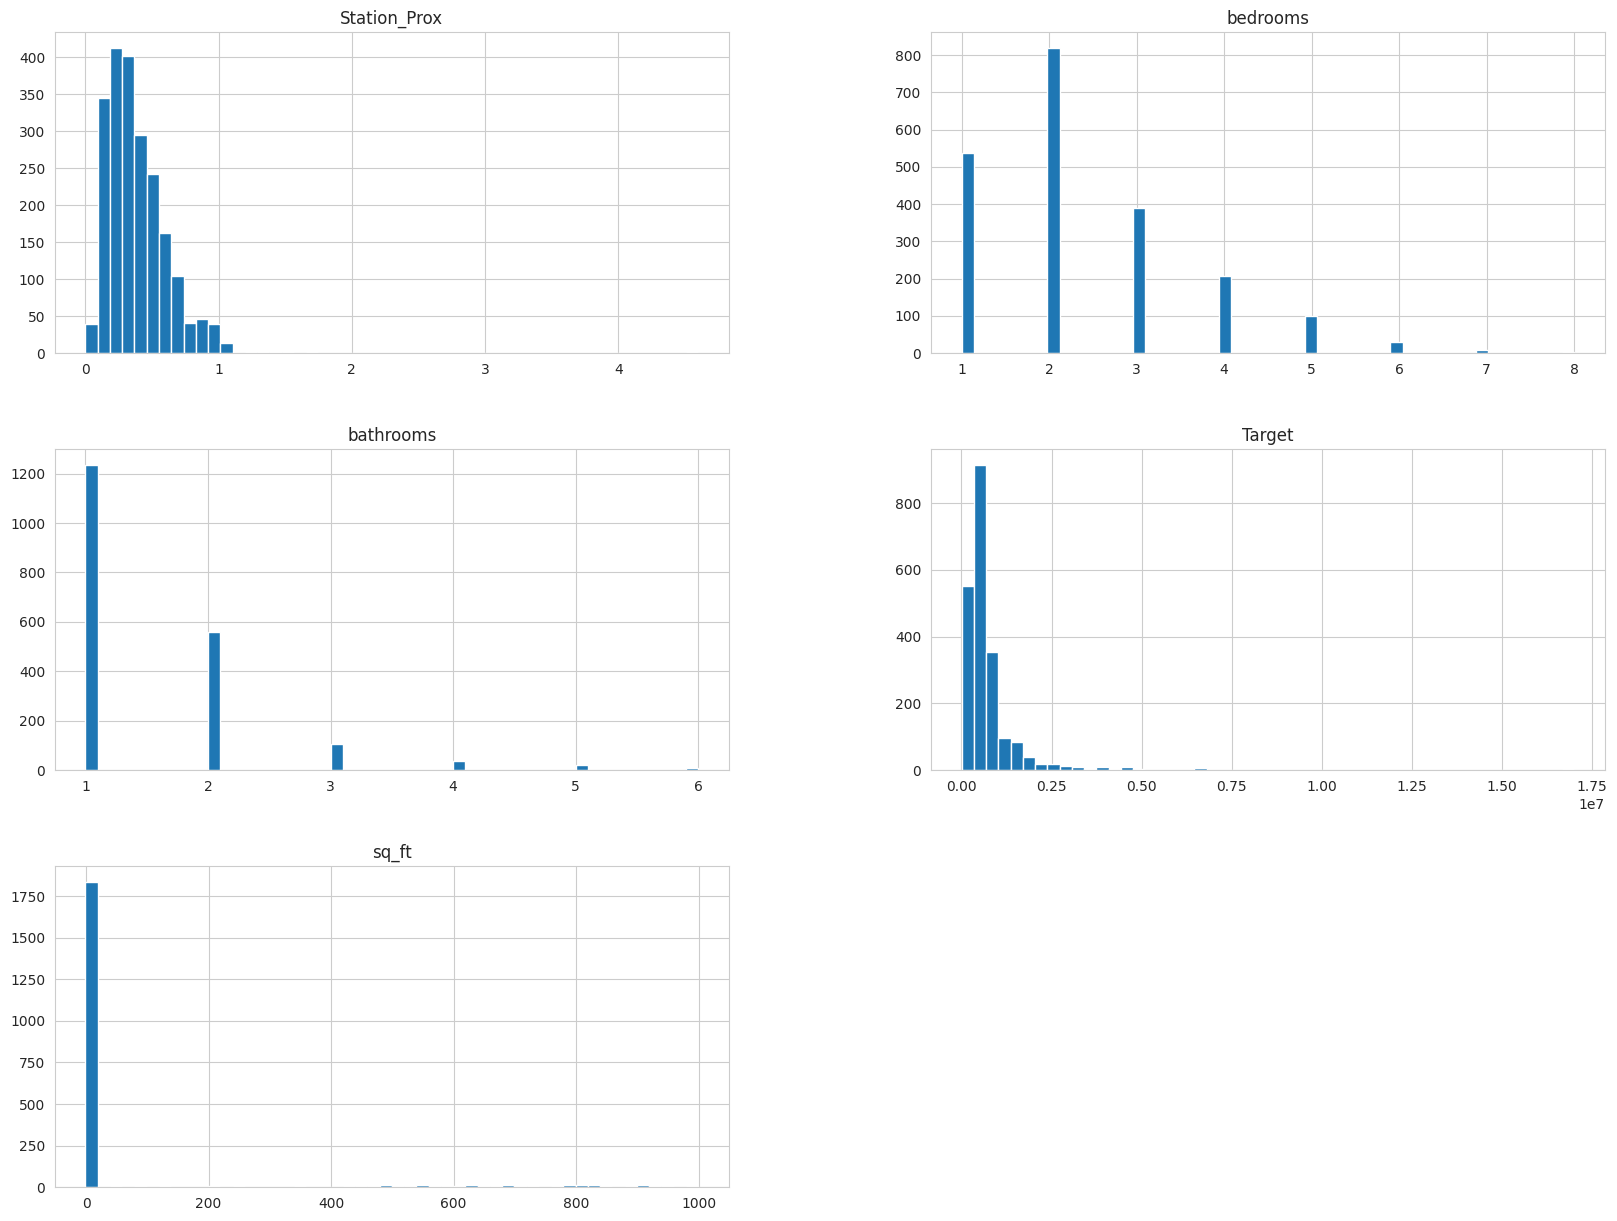

In [255]:
df_original.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'Target'}>],
       [<AxesSubplot:title={'center':'sq_ft'}>, <AxesSubplot:>]],
      dtype=object)

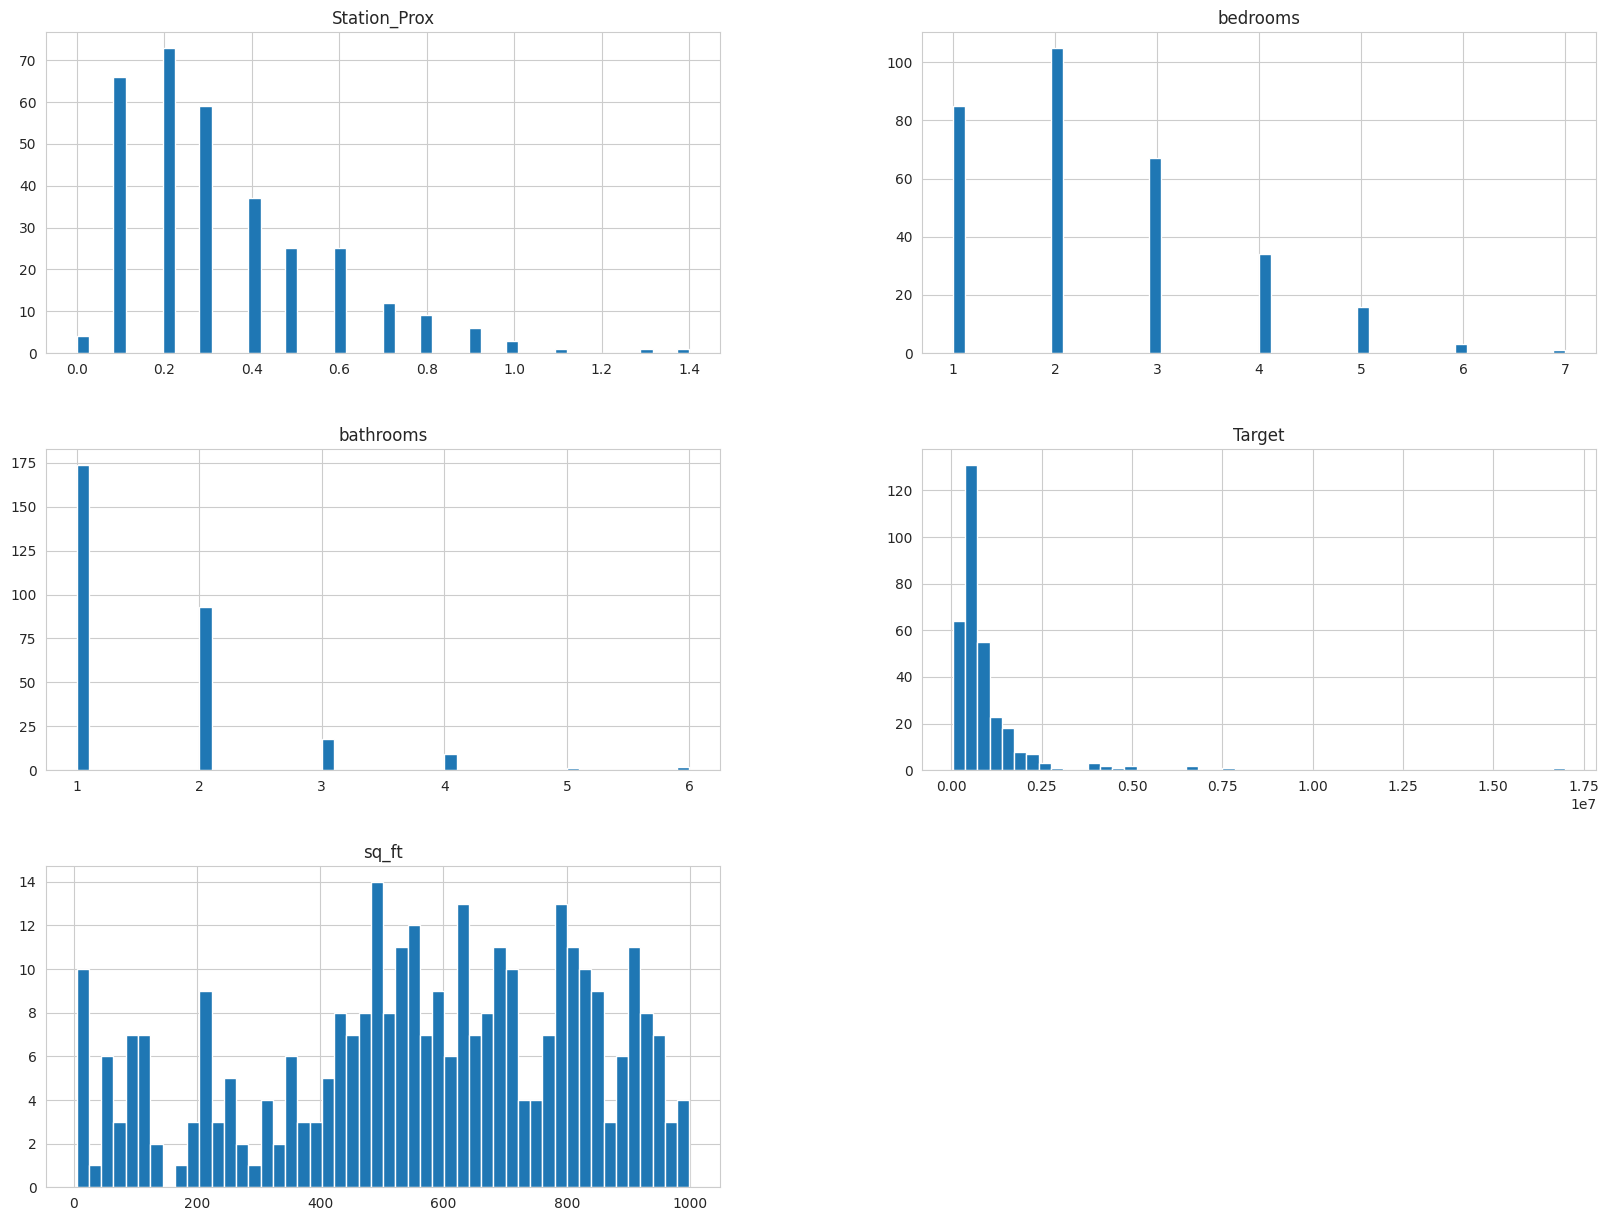

In [271]:
df_original[(df_original['sq_ft'] != -1) & (df_original['Target'] != -1)].hist(bins=50, figsize=(20,15))

In [257]:
df_original["postcode"].value_counts()

SW19        196
CR4          83
SW20         82
SM6          79
SW11         79
           ... 
KT4 8HF       1
SW11 6AE      1
SW20 9NJ      1
KT4 8QF       1
SW15 3AH      1
Name: postcode, Length: 110, dtype: int64

In [258]:
df_original["type"].value_counts()

flat          759
house         631
apartment     568
maisonette    117
Name: type, dtype: int64

In [259]:
for each in df_original.columns:

    if each not in ['other_key_info','bullet_points','station_info','long_description']:
        print(each)
        print(df_original[each].value_counts())

Address
Manor Road, Wallington                                         14
Pudding Lane, London, EC3R                                     11
Hackbridge Road, Wallington, Greater London\r\nSM6 7AX         10
Cricket Green, Mitcham, CR4                                    10
Stadia One, Wimbledon Grounds, SW17                             9
                                                               ..
Southdown Road, Wimbledon, London, SW20 8PX                     1
Birkbeck Road, London, SW19                                     1
Hartfield Mansions, Hartfield Road, Wimbledon, London, SW19     1
Marryat Road, London, SW19                                      1
Barbican, London, EC2Y                                          1
Name: Address, Length: 1693, dtype: int64
Description
2 bedroom flat for sale                  345
2 bedroom apartment for sale             283
1 bedroom flat for sale                  266
1 bedroom apartment for sale             197
3 bedroom terraced house for sal

In [260]:
df_original.iloc[:,:-1].shape,df_original.iloc[:,-1].shape,df_original["Target"].shape

((2149, 19), (2149,), (2149,))

In [261]:
df_original.head(20)

,Address,Description,Price,borough,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,Target,postcode,compass,sq_ft,hold_type2
ids,,,,,,,,,,,,,,,,,,,,
102189851,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,"('City of London', '5E61224')",0.1,apartment,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500000,EC2Y,EC,-1,NaN
103815017,"Clifton Park Avenue, London, SW20",2 bedroom apartment for sale,350000.0,"('Merton', '5E61414')",0.1,apartment,2.0,1.0,NaN,NaN,Double Aspect Reception/Lounge Diner;Modern Ki...,"[(0.1, 'Raynes Park Station', 'svg-nationalrai...",Tenure: Leasehold,Read more,A bright and spacious two double bedroom secon...,350000,SW20,SW,-1,Leasehold
104102132,"Charminster Road, Worcester Park, Surrey, KT4",4 bedroom detached house for sale,850000.0,"('Sutton', '5E93974')",0.9,house,4.0,2.0,NaN,NaN,ENTRANCE HALLWAY;FITTED KITCHEN /FAMILY ROOM 2...,"[(0.9, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE PORCH\r Double glazed front door to:-...,850000,KT4,KT,-1,Freehold
104457248,"Kingston Road, Raynes Park, London",1 bedroom apartment for sale,420000.0,"('Merton', '5E61414')",0.2,apartment,1.0,1.0,NaN,NaN,Estate Manager;24 hour helpline & video entry ...,"[(0.2, 'Wimbledon Chase Station', 'svg-nationa...",Tenure: Leasehold,Read more,A well presented and spacious one bedroom firs...,420000,NaN,NaN,-1,Leasehold
104489204,"High Street, Sutton",2 bedroom maisonette for sale,330000.0,"('Sutton', '5E93974')",0.4,maisonette,2.0,1.0,NaN,NaN,Long Lease;Private Garden;Split Level;Low Serv...,"[(0.4, 'West Sutton Station', 'svg-nationalrai...",Tenure: Leasehold,Read more,SUMMARY Unexpectedly back available! A two bed...,330000,NaN,NaN,-1,Leasehold
104567108,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,"('City of London', '5E61224')",0.2,flat,1.0,1.0,469 sq. ft.;(44 sq. m.),{},NaN,NaN,NaN,NaN,NaN,630000,EC4A,EC,469,NaN
104639057,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,"('City of London', '5E61224')",0.1,apartment,2.0,2.0,786 sq. ft.;(73 sq. m.),NaN,NaN,NaN,NaN,NaN,NaN,1600000,EC1N,EC,786,NaN
107158745,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,"('Sutton', '5E93974')",0.4,NaN,1.0,1.0,NaN,NaN,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,169950,NaN,NaN,-1,Leasehold
107182904,"Hildreth Street, Balham",Studio flat for sale,260000.0,"('Wandsworth', '5E93977')",0.1,flat,NaN,1.0,NaN,NaN,Private roof terrace;Period features;Well pres...,"[(0.1, 'Balham Station', 'svg-nationalrail;svg...",Tenure: Leasehold,Read more,A very well-presented studio apartment with an...,260000,NaN,NaN,-1,Leasehold


In [262]:
#df_original.drop("Links")
df = df_original.copy()
#df = df.drop(['Links','version_head','version_indiv','link'], axis=1)
df = df.drop(['Address','Description','Price','postcode'], axis=1)
df = df.drop(['borough','other_key_info','bullet_points','station_info'], axis=1)
df = df.drop(['short_description','long_description','hold_type','size'], axis=1)
df.head(20)

,Station_Prox,type,bedrooms,bathrooms,Target,compass,sq_ft,hold_type2
ids,,,,,,,,
102189851,0.1,apartment,3.0,3.0,3500000,EC,-1,NaN
103815017,0.1,apartment,2.0,1.0,350000,SW,-1,Leasehold
104102132,0.9,house,4.0,2.0,850000,KT,-1,Freehold
104457248,0.2,apartment,1.0,1.0,420000,NaN,-1,Leasehold
104489204,0.4,maisonette,2.0,1.0,330000,NaN,-1,Leasehold
104567108,0.2,flat,1.0,1.0,630000,EC,469,NaN
104639057,0.1,apartment,2.0,2.0,1600000,EC,786,NaN
107158745,0.4,NaN,1.0,1.0,169950,NaN,-1,Leasehold
107182904,0.1,flat,NaN,1.0,260000,NaN,-1,Leasehold


In [263]:
for column in ['type','compass','hold_type2']:
    df = pd.concat([df,pd.get_dummies(df[column], prefix=column)],axis=1)
    # now drop the original column (you don't need it anymore)
    df.drop([column],axis=1, inplace=True)
df.head(20)

,Station_Prox,bedrooms,bathrooms,Target,sq_ft,type_apartment,type_flat,type_house,type_maisonette,compass_CR,...,compass_N1,compass_N2,compass_N3,compass_NW,compass_SE,compass_SM,compass_SW,hold_type2_Freehold,hold_type2_Leasehold,hold_type2_Share of Freehold
ids,,,,,,,,,,,,,,,,,,,,,
102189851,0.1,3.0,3.0,3500000,-1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103815017,0.1,2.0,1.0,350000,-1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
104102132,0.9,4.0,2.0,850000,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
104457248,0.2,1.0,1.0,420000,-1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
104489204,0.4,2.0,1.0,330000,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
104567108,0.2,1.0,1.0,630000,469,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104639057,0.1,2.0,2.0,1600000,786,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107158745,0.4,1.0,1.0,169950,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
107182904,0.1,NaN,1.0,260000,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
if False:
    df.dropna(inplace=True)
    df

In [265]:
X = df.drop(["Target"],axis=1)
y = df["Target"]
X,y

(           Station_Prox  bedrooms  bathrooms  sq_ft  type_apartment  \
 ids                                                                   
 102189851           0.1       3.0        3.0     -1               1   
 103815017           0.1       2.0        1.0     -1               1   
 104102132           0.9       4.0        2.0     -1               0   
 104457248           0.2       1.0        1.0     -1               1   
 104489204           0.4       2.0        1.0     -1               0   
 ...                 ...       ...        ...    ...             ...   
 96654973            0.7       3.0        2.0     -1               0   
 96655021            0.2       3.0        2.0     -1               0   
 97404863            0.9       1.0        1.0     -1               1   
 97494416            0.3       1.0        1.0     -1               0   
 99839117            0.1       NaN        NaN     -1               0   
 
            type_flat  type_house  type_maisonette  compass_CR

# Exploratory Analysis

In [266]:
### does this work? it seems slow
#for each in df_original.columns[:2]:
#    x = df_original.plot(kind='scatter',x=each, y="Target")
#    plt.show()
#    #print (each)

In [267]:
### does this work? it doesn't seem to
#import numpy as np
#for each in df_original.columns:
#    print(each)
#
# x = df_original.plot(kind='scatter',x='bedrooms', y="Target")
# plt.yticks(np.arange(min(x), max(x)+1, 1000))
# plt.show()

In [268]:
# also not working
# df_original["Target"].describe()
# xx.describe()
# yy.dropna().describe()
# df_original["Target"]

<class 'pandas.core.series.Series'>
Int64Index: 2152 entries, 102189851 to 99839117
Series name: Target
Non-Null Count  Dtype
--------------  -----
2152 non-null   int64
dtypes: int64(1)
memory usage: 33.6 KB


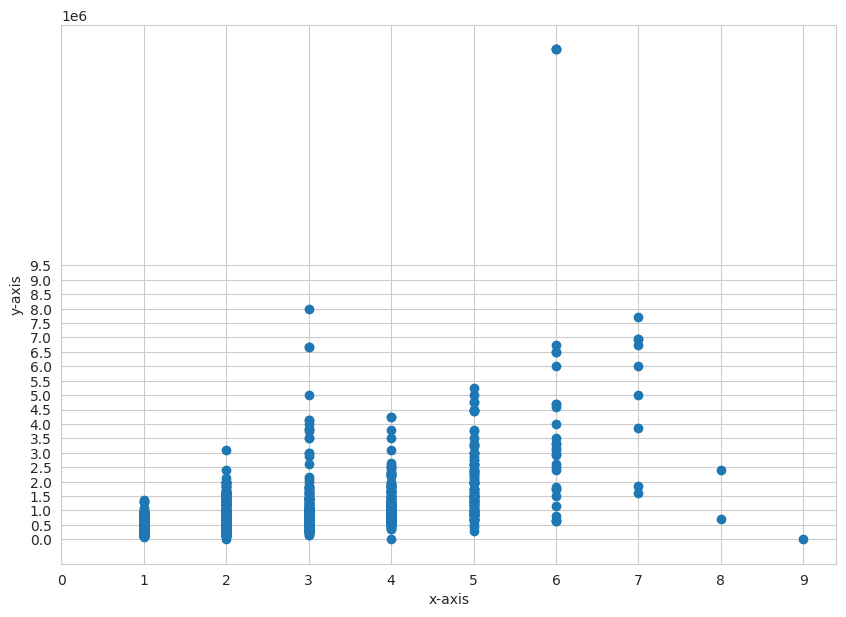

In [269]:
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

#print(subset.head())
subset.describe()
df_original["Target"].value_counts()
df_original["Target"].dtypes
df_original.dtypes

#df_original["Target"] = df_original["Target"].astype("float")
#df_original.dtypes

pd.to_numeric(df_original["Target"], 'coerce').dropna().astype(int)

xx = subset['bedrooms']
yy = subset['Target']

xx,yy
subset['Target'] = pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)
subset['Target'].info()

# Creating a subplot with 2 row and 1 column
fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes3.scatter(xx, yy)
axes3.set_ylabel('y-axis')
axes3.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes3.xaxis.set_ticks(np.arange(0, 10, 1))
#axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
#axes3.yaxis.set_ticks([0,10])
axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

plt.show()

Price


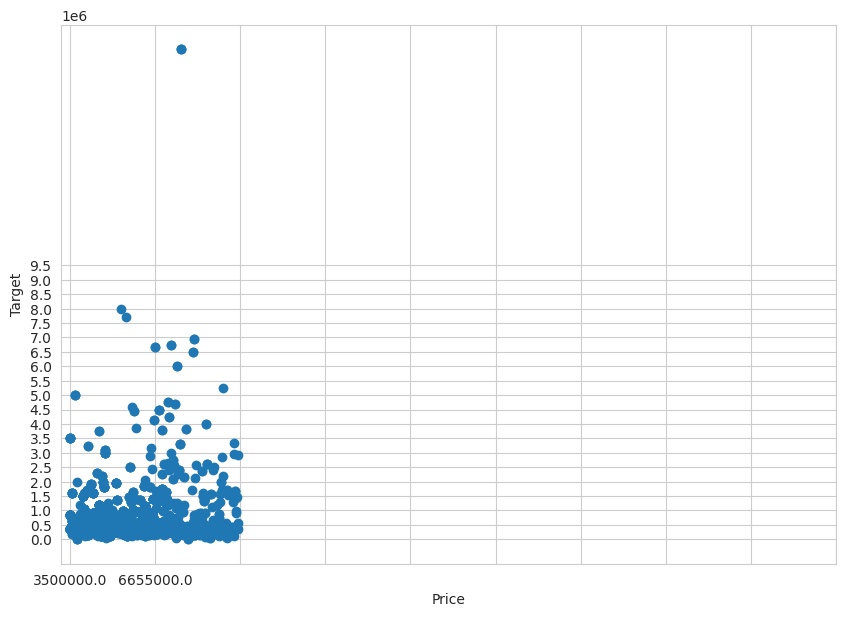

Station_Prox


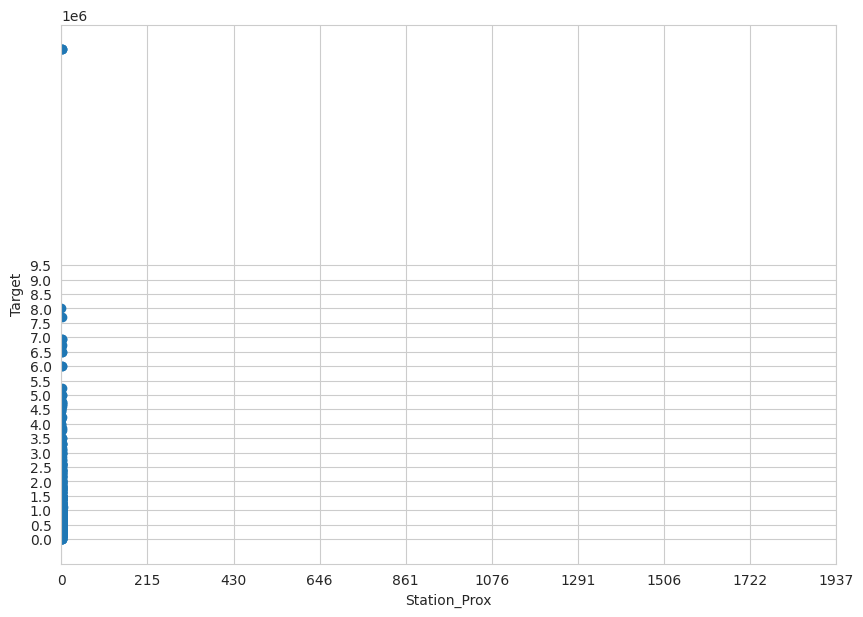

type


TypeError: 'value' must be an instance of str or bytes, not a float

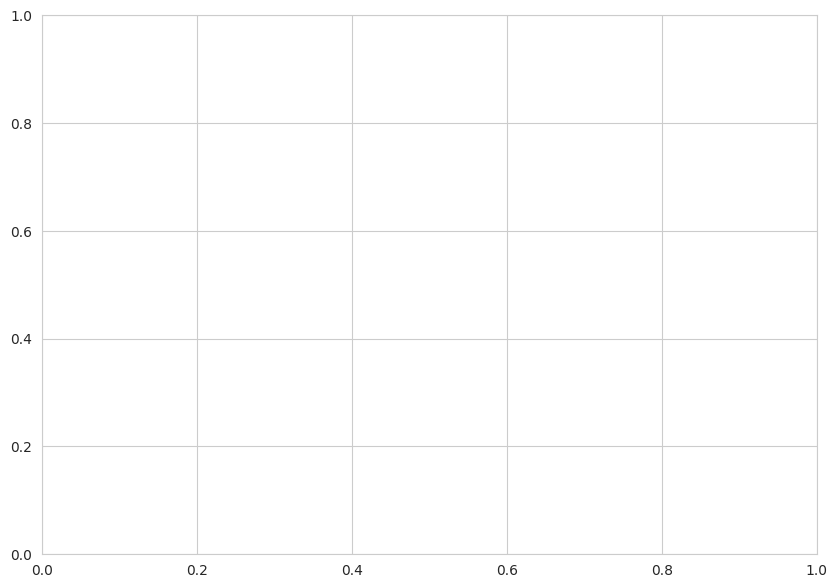

In [272]:
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

for x in subset.columns:

    if x not in ['other_key_info','bullet_points','station_info','long_description',
        'Address','Description',
        'borough'
                 ]:
        print(x)
        #x= 'bedrooms'
        y = 'Target'
        xx = subset[x]
        yy = subset[y]

        xx,yy

        # Creating a subplot with 2 row and 1 column
        fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

        # Plotting first axes object i.e. axes1 and labeling
        # its x and y axes
        axes3.scatter(xx, yy)
        axes3.set_ylabel(y)
        axes3.set_xlabel(x)

        # Setting the interval of ticks of x-axis to 1 and of y-axis
        # to 0.1 of first axes i.e. axes1.
        #axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
        #axes3.yaxis.set_ticks([0,10])
        axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

        #axes3.xaxis.set_ticks(np.arange(0, 10, 1))
        axes3.xaxis.set_ticks(np.arange(0, len(xx), len(xx)/10))

        plt.show()